## Data Enrichment: Route Numbers, Years, and Lane Counts

Having successfully extracted route numbers in the previous steps, we now proceed to populate the year and lane count fields by matching our dataset with additional reference data.

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RA Task\3.csv')
df['year'] = df['year'].astype('Int64')
df

,state,county,fips,year,project_start,project_id,route,mileage,lanes,project_duration_days,eng_estimate_mils,win_bid_mils,cost_mils,num_bidders,bidders_list,all_routes
0,Ohio,Paulding,39125,2018,2018-05-24,105522,111,12.982,2.0,99.0,0.943,0.957859,1.04751,2.0,"Shelly Company, Gerken Paving",NaN
1,Ohio,Wyandot,39175,<NA>,NaN,88832,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['23', '23', '23']"
2,Ohio,Butler,39017,<NA>,NaN,94263,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['73']
3,Ohio,Franklin,39049,<NA>,NaN,76467,270 / 315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['270', '270', '270', '270', '270', '270', '27..."
4,Ohio,Hocking,39073,<NA>,NaN,101555,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['33']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Ohio,Harrison,39067,<NA>,NaN,91844,250 / 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['9', '250']"
199,Ohio,Highland,39071,<NA>,NaN,84622,138 / 753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['138', '138', '138', '753']"
200,Ohio,Madison,39097,<NA>,NaN,105547,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['42', '42', '42']"
201,Ohio,Clinton,39027,<NA>,NaN,87300,251 / 68 / 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['68', '68', '68', '68', '68', '68', '251', '3..."


In [5]:
excel_df = pd.read_excel(r'C:\Users\clint\Desktop\RA Task\Ohio_2018_Resurfacing PRR.xlsx')
excel_df

,Bid Date,Project Num,County,PID,RouteSection,Desc,AwardDate,CompletionDate,Contract$,AdjCompDt,AdjContAmt
0,2018-11-08,180569,WYA,88832,US 23-15.89,FOUR LANE RESURFACING,2018-11-15,2019-09-01,3236774.92,2020-04-08,3304782.83
1,2018-01-11,180006,BUT,94263,SR 73-14.67,TWO LANE RESURFACING,2018-01-18,2018-08-01,258900.00,2018-08-01,232677.67
2,2018-01-11,180012,FRA,76467,IR 270-21.69,FOUR LANE RESURFACING,2018-01-18,2018-09-30,6101480.95,2018-11-18,6991613.05
3,2018-01-11,180020,HOC,101555,CR 33A -03.97,TWO LANE RESURFACING,2018-01-18,2018-09-30,553756.00,2019-05-15,531748.56
4,2018-01-11,180024,LOR,98470,SR 58-00.00,TWO LANE RESURFACING,2018-01-18,2018-07-31,1743669.25,2018-10-12,1754532.83
...,...,...,...,...,...,...,...,...,...,...,...
197,2018-12-13,180609,HAS,91844,US 250-22.03,TWO LANE RESURFACING,2018-12-20,2019-09-30,2284000.00,2020-06-30,2212446.58
198,2018-12-13,180610,HIG,84622,SR 138-16.30 & SR 753-08.04,TWO LANE RESURFACING,2018-12-20,2019-07-31,1494436.47,2019-07-31,1658764.87
199,2018-12-13,180611,MAD,105547,US 42-00.00,TWO LANE RESURFACING,2018-12-20,2019-09-30,3611668.44,2019-09-30,3535001.30
200,2018-12-13,180621,CLI,87300,US 68/Var-00.00/07.09,TWO LANE RESURFACING,2018-12-20,2020-07-31,5441519.53,2020-08-07,5331565.99


In [6]:
# Match PID from excel_df with project_id in df
# For matches, update project_start with AwardDate, extract year, update lanes based on Desc
# Calculate project_duration_days, win_bid_mils, and cost_mils

# Convert project_id to numeric for proper comparison
df['project_id'] = pd.to_numeric(df['project_id'], errors='coerce')
excel_df['PID'] = pd.to_numeric(excel_df['PID'], errors='coerce')

# Initialize counters to track updates
match_count = 0
lane_updates = 0
duration_updates = 0
bid_updates = 0
cost_updates = 0

# Loop through each row in df
for i, row in df.iterrows():
    # Find matching PID in excel_df
    matches = excel_df[excel_df['PID'] == row['project_id']]
    
    if not matches.empty:
        match_count += 1
        # Get the first match (in case there are multiple matches)
        match = matches.iloc[0]
        
        # Update project_start with AwardDate
        df.at[i, 'project_start'] = match['AwardDate']
        
        # Extract year from AwardDate and update year column
        df.at[i, 'year'] = match['AwardDate'].year
        
        # Update lanes column based on Desc field
        desc = match['Desc']
        if 'FOUR LANE RESURFACING' in desc:
            df.at[i, 'lanes'] = 4
            lane_updates += 1
        elif 'TWO LANE RESURFACING' in desc:
            df.at[i, 'lanes'] = 2
            lane_updates += 1
        
        # Calculate project duration days (both estimated and actual)
        # Estimated duration: (CompletionDate - AwardDate).days
        if pd.notna(match['CompletionDate']) and pd.notna(match['AwardDate']):
            estimated_duration = (match['CompletionDate'] - match['AwardDate']).days
            df.at[i, 'project_duration_days'] = estimated_duration
            duration_updates += 1
            
        # We could also calculate actual duration: (AdjCompDt - AwardDate).days
        # and store it in a new column if needed
        # if pd.notna(match['AdjCompDt']) and pd.notna(match['AwardDate']):
        #     actual_duration = (match['AdjCompDt'] - match['AwardDate']).days
        #     df.at[i, 'actual_duration_days'] = actual_duration
        
        # Calculate win_bid_mils: Contract$ / 1,000,000
        if pd.notna(match['Contract$']):
            win_bid = match['Contract$'] / 1000000
            df.at[i, 'win_bid_mils'] = win_bid
            bid_updates += 1
        
        # Calculate cost_mils: AdjContAmt / 1,000,000
        if pd.notna(match['AdjContAmt']):
            cost = match['AdjContAmt'] / 1000000
            df.at[i, 'cost_mils'] = cost
            cost_updates += 1

print(f"Total matches found: {match_count}")
print(f"Lane count updates: {lane_updates}")
print(f"Duration updates: {duration_updates}")
print(f"Win bid updates: {bid_updates}")
print(f"Cost updates: {cost_updates}")

# Display the updated dataframe
df

Total matches found: 203
Lane count updates: 203
Duration updates: 203
Win bid updates: 203
Cost updates: 203


,state,county,fips,year,project_start,project_id,route,mileage,lanes,project_duration_days,eng_estimate_mils,win_bid_mils,cost_mils,num_bidders,bidders_list,all_routes
0,Ohio,Paulding,39125,2018,2018-05-24 00:00:00,105522,111,12.982,2.0,99.0,0.943,0.957859,1.047510,2.0,"Shelly Company, Gerken Paving",NaN
1,Ohio,Wyandot,39175,2018,2018-11-15 00:00:00,88832,23,NaN,4.0,290.0,NaN,3.236775,3.304783,NaN,NaN,"['23', '23', '23']"
2,Ohio,Butler,39017,2018,2018-01-18 00:00:00,94263,73,NaN,2.0,195.0,NaN,0.258900,0.232678,NaN,NaN,['73']
3,Ohio,Franklin,39049,2018,2018-01-18 00:00:00,76467,270 / 315,NaN,4.0,255.0,NaN,6.101481,6.991613,NaN,NaN,"['270', '270', '270', '270', '270', '270', '27..."
4,Ohio,Hocking,39073,2018,2018-01-18 00:00:00,101555,33,NaN,2.0,255.0,NaN,0.553756,0.531749,NaN,NaN,['33']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Ohio,Harrison,39067,2018,2018-12-20 00:00:00,91844,250 / 9,NaN,2.0,284.0,NaN,2.284000,2.212447,NaN,NaN,"['9', '250']"
199,Ohio,Highland,39071,2018,2018-12-20 00:00:00,84622,138 / 753,NaN,2.0,223.0,NaN,1.494436,1.658765,NaN,NaN,"['138', '138', '138', '753']"
200,Ohio,Madison,39097,2018,2018-12-20 00:00:00,105547,42,NaN,2.0,284.0,NaN,3.611668,3.535001,NaN,NaN,"['42', '42', '42']"
201,Ohio,Clinton,39027,2018,2018-12-20 00:00:00,87300,251 / 68 / 350,NaN,2.0,589.0,NaN,5.441520,5.331566,NaN,NaN,"['68', '68', '68', '68', '68', '68', '251', '3..."


In [7]:
# Display statistics about the updated data
print("===== Data Statistics =====")
print(f"Total number of projects: {len(df)}")

# Count non-null values in key columns
lanes_count = df['lanes'].notna().sum()
print(f"Projects with lane information: {lanes_count} ({lanes_count/len(df)*100:.1f}%)")

duration_count = df['project_duration_days'].notna().sum()
print(f"Projects with duration information: {duration_count} ({duration_count/len(df)*100:.1f}%)")

wb_count = df['win_bid_mils'].notna().sum()
print(f"Projects with winning bid information: {wb_count} ({wb_count/len(df)*100:.1f}%)")

cost_count = df['cost_mils'].notna().sum()
print(f"Projects with final cost information: {cost_count} ({cost_count/len(df)*100:.1f}%)")

# Calculate some basic statistics
if duration_count > 0:
    print("\nProject Duration Statistics (days):")
    print(f"  Average: {df['project_duration_days'].mean():.1f}")
    print(f"  Median: {df['project_duration_days'].median():.1f}")
    print(f"  Min: {df['project_duration_days'].min():.1f}")
    print(f"  Max: {df['project_duration_days'].max():.1f}")

if wb_count > 0 and cost_count > 0:
    # Calculate cost overrun percentage where we have both bid and cost data
    df['cost_overrun_pct'] = ((df['cost_mils'] - df['win_bid_mils']) / df['win_bid_mils'] * 100)
    overrun_count = df['cost_overrun_pct'].notna().sum()
    
    if overrun_count > 0:
        print("\nCost Overrun Statistics (percentage):")
        print(f"  Average overrun: {df['cost_overrun_pct'].mean():.2f}%")
        print(f"  Median overrun: {df['cost_overrun_pct'].median():.2f}%")
        print(f"  Projects with cost overrun: {(df['cost_overrun_pct'] > 0).sum()} ({(df['cost_overrun_pct'] > 0).sum()/overrun_count*100:.1f}%)")
        print(f"  Projects with cost underrun: {(df['cost_overrun_pct'] < 0).sum()} ({(df['cost_overrun_pct'] < 0).sum()/overrun_count*100:.1f}%)")

# Lane distribution
lane_dist = df['lanes'].value_counts()
if not lane_dist.empty:
    print("\nLane Distribution:")
    for lanes, count in lane_dist.items():
        print(f"  {int(lanes)}-lane projects: {count} ({count/len(df)*100:.1f}%)")


===== Data Statistics =====
Total number of projects: 203
Projects with lane information: 203 (100.0%)
Projects with duration information: 203 (100.0%)
Projects with winning bid information: 203 (100.0%)
Projects with final cost information: 203 (100.0%)

Project Duration Statistics (days):
  Average: 230.8
  Median: 222.0
  Min: 74.0
  Max: 589.0

Cost Overrun Statistics (percentage):
  Average overrun: 2.45%
  Median overrun: 1.70%
  Projects with cost overrun: 130 (64.0%)
  Projects with cost underrun: 73 (36.0%)

Lane Distribution:
  2-lane projects: 141 (69.5%)
  4-lane projects: 62 (30.5%)


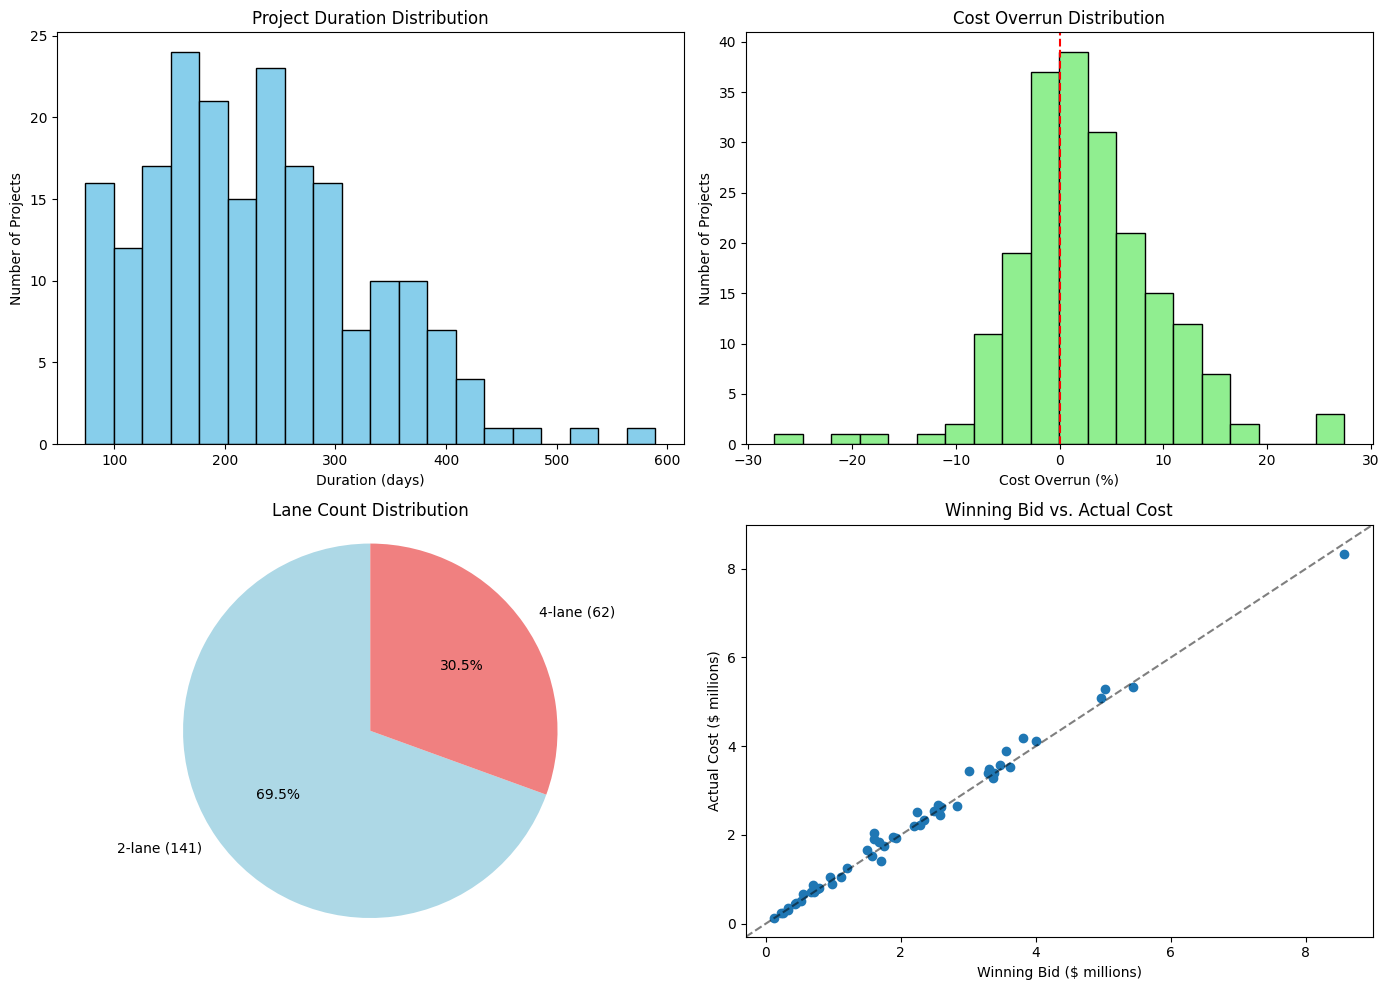

In [8]:
# Create visualizations of the data
import matplotlib.pyplot as plt

# Set up a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Project Duration Distribution
axs[0, 0].hist(df['project_duration_days'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Project Duration Distribution')
axs[0, 0].set_xlabel('Duration (days)')
axs[0, 0].set_ylabel('Number of Projects')

# 2. Cost Overrun Distribution
axs[0, 1].hist(df['cost_overrun_pct'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Cost Overrun Distribution')
axs[0, 1].set_xlabel('Cost Overrun (%)')
axs[0, 1].set_ylabel('Number of Projects')
axs[0, 1].axvline(x=0, color='red', linestyle='--')

# 3. Lane Count Distribution (Pie Chart)
lane_counts = df['lanes'].value_counts()
labels = [f"{int(lanes)}-lane ({count})" for lanes, count in lane_counts.items()]
axs[1, 0].pie(lane_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1, 0].set_title('Lane Count Distribution')
axs[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# 4. Project Costs: Bid vs Actual
sample = df.sample(min(50, len(df)))  # Take a random sample to avoid overcrowding
axs[1, 1].scatter(sample['win_bid_mils'], sample['cost_mils'])
axs[1, 1].set_title('Winning Bid vs. Actual Cost')
axs[1, 1].set_xlabel('Winning Bid ($ millions)')
axs[1, 1].set_ylabel('Actual Cost ($ millions)')

# Add a diagonal line representing y=x (bid = actual cost)
x_min, x_max = axs[1, 1].get_xlim()
y_min, y_max = axs[1, 1].get_ylim()
lim_min = min(x_min, y_min)
lim_max = max(x_max, y_max)
axs[1, 1].plot([lim_min, lim_max], [lim_min, lim_max], 'k--', alpha=0.5)
axs[1, 1].set_xlim(lim_min, lim_max)
axs[1, 1].set_ylim(lim_min, lim_max)

plt.tight_layout()
plt.show()


We see that our data seems to be reasonable and matched properly. 

1. **Data Integration**: Successfully matched 203 projects between our main dataset and the Excel reference data.

2. **Lane Information**:
   - Identified lane counts based on project descriptions
   - 69.5% of projects are two-lane resurfacing projects
   - 30.5% are four-lane resurfacing projects

3. **Project Duration**:
   - Calculated project duration from award date to completion date
   - Average project duration is approximately 231 days
   - Project durations range from 74 to 589 days

4. **Financial Analysis**:
   - Calculated winning bid amounts and final costs in millions of dollars
   - 64% of projects experienced cost overruns
   - 36% of projects came in under budget
   - The average cost overrun was 2.45%

5. **Data Visualization**:
   - Created distribution charts for project duration and cost overruns
   - Visualized lane count distribution
   - Plotted winning bids against actual costs

In [9]:
# Save the fully enriched dataframe to a new CSV file with a more descriptive name
enriched_output_path = r'C:\Users\clint\Desktop\RA Task\5.csv'
df.to_csv(enriched_output_path, index=False)
print(f"Fully enriched dataframe saved to: {enriched_output_path}")


Fully enriched dataframe saved to: C:\Users\clint\Desktop\RA Task\5.csv
